In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('diabetes.csv')


#describ
df['smoking_history'] = df['smoking_history'].replace({
    'never': 1, 'not current': 2, 'former': 3, 'current': 4, 'ever': 5, 'No Info': 6
})
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# Define features and target
X = df.iloc[:, 1:8]
y = df['diabetes']

# Normalize the numeric features
scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)



In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:8], df['diabetes'])


0.01 :  0.96192   0.6366197183098592
0.1 :  0.96224   0.6483568075117371
1 :  0.96228   0.6502347417840375
10 :  0.96224   0.6502347417840375
100 :  0.96228   0.6502347417840375


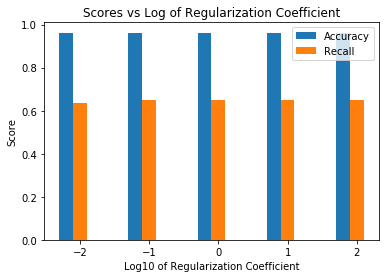

In [6]:
cs = [0.01, 0.1, 1, 10, 100]

lab = np.array([-2,-1, 0, 1, 2])
scores = []
r_scores = []

for c in cs:
    LR = LogisticRegression(max_iter = 1000000, C = c)
    LR.fit(X_train, y_train)

    y_pred = LR.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    scores.append(score)
    r_scores.append(r_score)
    print (c, ": ", score, " ", r_score)
plt.bar(lab-0.2, scores, width = 0.2, label = "Accuracy")
plt.bar(lab, r_scores, width=0.2, label = "Recall")

plt.title("Scores vs Log of Regularization Coefficient")
plt.xlabel("Log10 of Regularization Coefficient")
plt.ylabel("Score")
plt.legend()

In [7]:
LR = LogisticRegression(max_iter = 1000000, C = 10)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(score)
print(LR.coef_)

0.96224
[[ 0.26571705  0.046104    0.73977826  0.74108286 -0.0814369   0.09030738
   2.29930753  0.03314921]]


In [8]:
headers = list(df)
importance = LR.coef_

for i in range(7):
    print(headers[i+1], ": ", importance[0][i])

age :  0.2657170534628076
hypertension :  0.0461040046440974
heart_disease :  0.7397782586983163
smoking_history :  0.7410828645072889
bmi :  -0.081436898008616
HbA1c_level :  0.0903073823901943
blood_glucose_level :  2.299307528917456


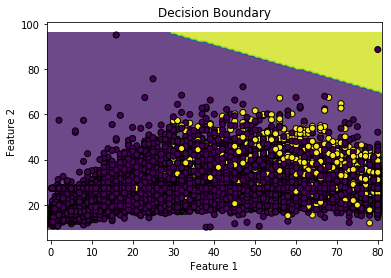

In [42]:
x_min, x_max = X_test['age'].min() - 1, X_test['age'].max() + 1
y_min, y_max = X_test['bmi'].min() - 1, X_test['bmi'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the meshgrid
pass # TODO

ht = np.array([st.mode(X_test['hypertension']).mode.item() for i in range(10000)])
hd = np.array([st.mode(X_test['heart_disease']).mode.item() for i in range(10000)])
sh = np.array([st.mode(X_test['smoking_history']).mode.item() for i in range(10000)])

hb = np.array([np.mean(X_test['HbA1c_level']) for i in range(10000)])
gc = np.array([np.mean(X_test['blood_glucose_level']) for i in range(10000)])


Z = LR.predict(np.c_[np.ravel(xx), ht, hd, sh, np.ravel(yy), hb, gc])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test['age'], X_test['bmi'], c=y_test, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()